In [2]:
#from uatu.watchers import *
from sklearn.model_selection import train_test_split
import h5py

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
f = h5py.File('/home/users/swmclau2/scratch/UatuLightconeTest/UatuLightconeTest.hdf5', 'r')
boxno = 2
test_X = np.array(f['Box%03d'%boxno]["X"].value)
test_Y = f['Box%03d'%boxno]['Y'].value
f.close()

In [5]:
f = h5py.File('/home/users/swmclau2/scratch/UatuLightconeTest/UatuLightconeAttacked.hdf5', 'r')
boxno = 13
attack_X = np.array(f['Box%03d'%boxno]["X"].value)
attack_Y = f['Box%03d'%boxno]['Y'].value
f.close()

In [6]:
print attack_Y[0,:]
print test_Y[0,:]

[ 0.311153  0.909033]
[ 0.311153  0.909033]


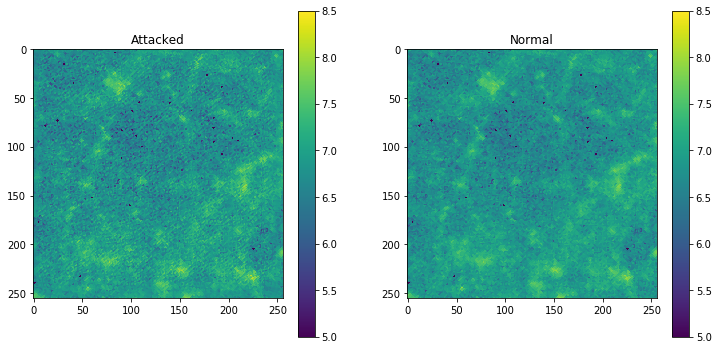

In [7]:
fig = plt.figure(figsize = (19, 6))
#boxno = 0
n = 100
plt.subplot(131)
im = plt.imshow(attack_X[n, :, :, 0], vmin = 5, vmax = 8.5)
plt.colorbar(im)
#plt.title(r"$\Omega_m$: %0.3f    $\sigma_8$: %0.3f"%(attack_Y[0,0], attack_Y[0,1]))
plt.title('Attacked')
plt.subplot(132)

im = plt.imshow(test_X[n, :, :, 0], vmin = 5, vmax = 8.5)
plt.colorbar(im)
plt.title('Normal')
#plt.title(r"$\Omega_m$: %0.3f    $\sigma_8$: %0.3f"%(test_Y[0][0], test_Y[0][1]))
#plt.subplot(133)

#im = plt.imshow(attack_X[0, :, :, 0]- test_X[0, :, :, 0], vmin = -1, vmax = 8.5)
#plt.colorbar(im)
#plt.title('Diff')

plt.show()

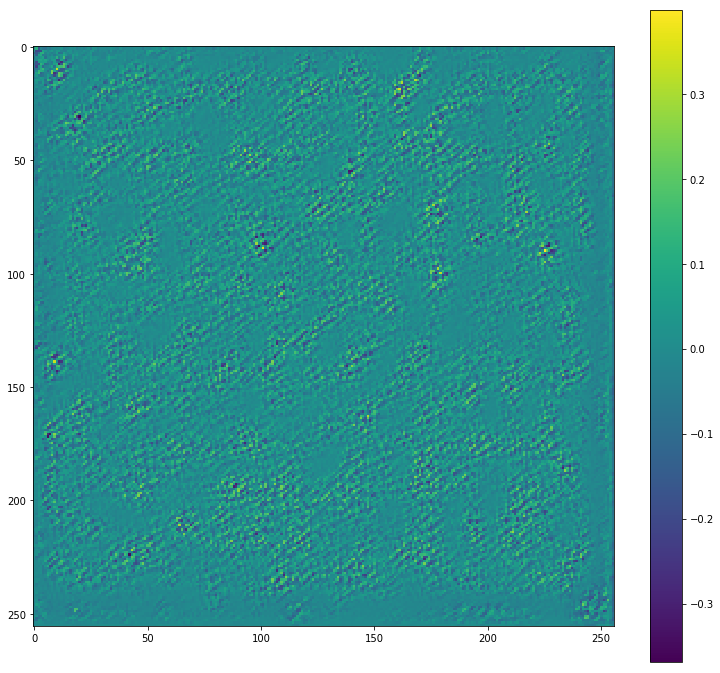

In [8]:
fig = plt.figure(figsize = (13, 12))

im = plt.imshow(attack_X[n, :, :, 0]- test_X[n, :, :, 0])
plt.colorbar(im)
plt.show()

In [9]:
from matplotlib import cm

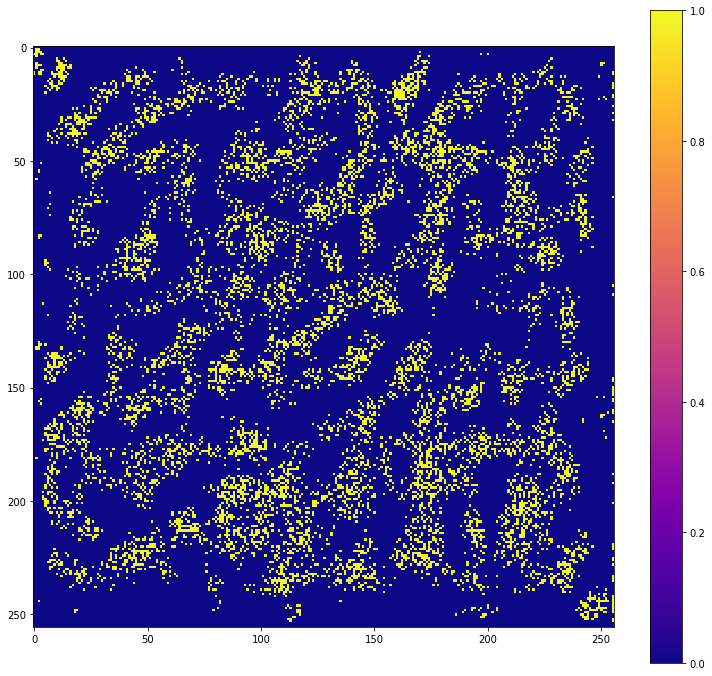

In [10]:
fig = plt.figure(figsize = (13, 12))

testx = test_X[n, :, :, 0].copy()
#testx[testx<7] = 0.0
#testx[testx>7] = 1.0
#plt.imshow(testx,cmap = 'viridis', alpha = 1.0)
diff = attack_X[n, :, :, 0]- test_X[n, :, :, 0]
diff[np.abs(diff)<0.1] = 0.0
diff[np.abs(diff)>0.1] = 1.0
#diff[diff<-0.1] = -1.0


im = plt.imshow(diff, cmap = cm.plasma, alpha = 1.0)#, alpha )

plt.colorbar(im)
plt.show()

In [99]:
fig = plt.figure(figsize = (6,6))
i = 38
im = plt.imshow(X[0, i, :, :, 0], norm=LogNorm())
#plt.colorbar(im)
#plt.title(r"$\Omega_m$: %0.3f    $\sigma_8$: %0.3f"%(Y[0][0], Y[0][1]))
plt.xticks([])
plt.yticks([])
plt.show()

IndexError: too many indices for array

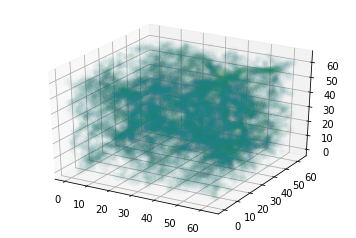

In [187]:
plt_X = X[0, :, :, :, 0]
plt_X[plt_X.mean()> plt_X] = 0

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib


minima = np.min(plt_X)+1e-1
maxima = np.max(plt_X)

norm = matplotlib.colors.LogNorm(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('viridis'))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = np.nonzero(plt_X)
ax.scatter(xs, ys, zs, c=mapper.to_rgba(plt_X[xs, ys, zs]), alpha = 0.01, norm = norm)


plt.show()

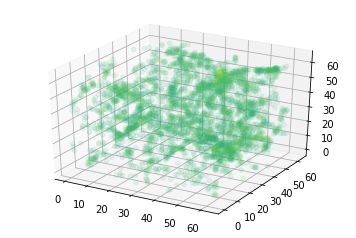

In [188]:
plt_X = X[0, :, :, :, 0]
plt_X[plt_X.mean()*10> plt_X] = 0

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib


minima = np.min(plt_X)+1e-1
maxima = np.max(plt_X)

norm = matplotlib.colors.LogNorm(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('viridis'))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = np.nonzero(plt_X)
ax.scatter(xs, ys, zs, c=mapper.to_rgba(plt_X[xs, ys, zs]), alpha = 0.1, norm = norm)


plt.show()

In [189]:
minima, maxima

(0.1, 3460)

In [191]:
all_Ys = np.array(all_Ys)

In [193]:
import seaborn as sns
sns.PairGrid(all_Ys[:, 0], all_Ys[:, 1])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices